# Exploring and Visualizing Metadata

Metadata is data that provides information about other data. Metadata might refer to basic file information like file size or source information, tracking information like index numbers or dates, or metadata might refer to a statistical summary of the data's contents.

This excersize will explore metadata for the Hansard debates from the 1860s with the purpose of familiarizing ourselves with the data's contents. After inspecting the Hansard metadata we will create our own metadata about the debates, specifically, metadata about the frequency of each bigram, or pair of consecutive elements, in the 1860s debates.

After creating our own metadata we will visualize top bigrams to better understand what our metadata communicates about the Hansard debates and what insight it can give us about the discourse of Parliament.

<div class="alert alert-block alert-info">
<b>Note:</b> The metadata for this Notebook is located on M2 at `/scratch/group/history/hist_3368-jguldi`.
</div>

### Inspecting the Hansard Metadata

We can use tools from the pandas package to read in the Hansard data. pandas provides data structures and data processing tools designed to work with tabular, heterogeneous data where each column is a different type like our data.

In [1]:
import pandas as pd

After importing pandas we can read in our sample data. The Hansard data is comma-delimited and can be read using the `.read_csv()` method. The below code reads the Hansard data and stores it in a variable named `hansard`.

In [2]:
hansard = pd.read_csv('hansard_1860_69.csv')

Python provides several ways to inspect a variable's contents. We will use just a few of these ways to explore the Hansard metadata.

`.shape`, for example, returns a tuple containing the number of `hansard`'s rows followed by its number of columns.

In [3]:
hansard.shape

(1035152, 5)

`.columns` returns just the data's column names with the variable's data type.

In [4]:
hansard.columns

Index(['sentence_id', 'speechdate', 'debate', 'text', 'speaker'], dtype='object')

`type()` returns the class type of the object passed to its parameter, in this case our `hansard` variable.

In [5]:
type(hansard)

pandas.core.frame.DataFrame

`head()` returns the first n rows of the pandas DataFrame.

In [6]:
hansard.head(n=10)

,sentence_id,speechdate,debate,text,speaker
0,S3V0156P0_0,1860-01-24,MEETING OF THE PARLIAMENT.,which had been prorogued successively to the 2...,"THE PARLIAMENT,"
1,S3V0156P0_1,1860-01-24,THE QUEEN'S SPEECH.,"being seated on the Throne, and the Commons be...",THE QUEEN
2,S3V0156P0_2,1860-01-24,ADDRESS IN ANSWER TO HER MAJESTY'S SPEECH.,in rising to move that an humble Address be pr...,"EARL FITZWILLIAM,"
3,S3V0156P0_3,1860-01-24,ADDRESS IN ANSWER TO HER MAJESTY'S SPEECH.,"My Lords, it is with diffidence that I rise to...","EARL FITZWILLIAM,"
4,S3V0156P0_4,1860-01-24,ADDRESS IN ANSWER TO HER MAJESTY'S SPEECH.,We hear from Her gracious Majesty that it is w...,"EARL FITZWILLIAM,"
5,S3V0156P0_5,1860-01-24,ADDRESS IN ANSWER TO HER MAJESTY'S SPEECH.,"She meets her Parliament, that She continues o...","EARL FITZWILLIAM,"
6,S3V0156P0_6,1860-01-24,ADDRESS IN ANSWER TO HER MAJESTY'S SPEECH.,I heard but yesterday that a Commercial Treaty...,"EARL FITZWILLIAM,"
7,S3V0156P0_7,1860-01-24,ADDRESS IN ANSWER TO HER MAJESTY'S SPEECH.,I for one cannot hear of this Treaty otherwise...,"EARL FITZWILLIAM,"
8,S3V0156P0_8,1860-01-24,ADDRESS IN ANSWER TO HER MAJESTY'S SPEECH.,One circumstance we cannot hear of without reg...,"EARL FITZWILLIAM,"
9,S3V0156P0_9,1860-01-24,ADDRESS IN ANSWER TO HER MAJESTY'S SPEECH.,But I will turn from that topic to one which w...,"EARL FITZWILLIAM,"


`tail()` returns the last n rows of the pandas DataFrame.

In [7]:
hansard.tail(n=10)

,sentence_id,speechdate,debate,text,speaker
1035142,S3V0198P0_19116,1869-08-11,BURGLARIES AT STAINES. —QUESTION.,The value of the property taken in one case wa...,MR. BRUCE
1035143,S3V0198P0_19117,1869-08-11,BURGLARIES AT STAINES. —QUESTION.,In consequence of the burglaries two mounted p...,MR. BRUCE
1035144,S3V0198P0_19118,1869-08-11,JAMAICA CLERGY ACT. —QUESTION.,"said, he wished to ask the Under Secretary of ...",MR. M'ARTHUR
1035145,S3V0198P0_19119,1869-08-11,JAMAICA CLERGY ACT. —QUESTION.,"said, in reply, that the Jamaica Clergy Act wo...",MR. MONSELL
1035146,S3V0198P0_19120,1869-08-11,JAMAICA CLERGY ACT. —QUESTION.,"Under that Act more than £20, 000, raised out ...",MR. MONSELL
1035147,S3V0198P0_19121,1869-08-11,JAMAICA CLERGY ACT. —QUESTION.,By the Census of 1861 it appeared that there w...,MR. MONSELL
1035148,S3V0198P0_19122,1869-08-11,JAMAICA CLERGY ACT. —QUESTION.,"Of this sum of £20, 000, all, except £370, wen...",MR. MONSELL
1035149,S3V0198P0_19123,1869-08-11,JAMAICA CLERGY ACT. —QUESTION.,Under these circumstances it had been determin...,MR. MONSELL
1035150,S3V0198P0_19124,1869-08-11,JAMAICA CLERGY ACT. —QUESTION.,No scheme had yet been submitted by the Govern...,MR. MONSELL
1035151,S3V0198P0_19125,1869-08-11,PROROGATION OF THE PARLIAMENT.,said—,THE LORD CHANCELLOR


From this quick overview we learned that our data is stored as a panda's DataFrame and its columns contain the following:

 - indexes for every row
 - unique IDs for every sentence
 - the dates of the debates
 - the title of the debate
 - the debate text
 - the speaker

We also learned that the debates in our sample data begin in January 1860 and end in December 1869.

The usefulness of the provided metadata for analysis is limited, however. In the following section we will create our own metadata about the bigrams recorded in the Hansard debates.

### Installing and Importing textacy and spaCy

<div class="alert alert-block alert-info">
<b>Note:</b> This instruction is intended for those running Jupyter on their personal computers. textacy and spaCy are already installed on M2.
</div>

Neither textacy or spaCy are native to the Conda environment so they require installation before they can be imported. textacty can be easily installed from the Anaconda cloud with `conda install`.

In [ ]:
conda install -c conda-forge textacy

spaCy can be installed on the command line or by running a Shell command in Jupyter. To run Shell commands in Jupyter use `!` followed by the command you wish to execute.

The following code installs spaCy and downloads the English language model.

In [ ]:
!pip install spacy
!spacy download en

<div class="alert alert-block alert-info">
<b>Note:</b> Windows users should run Jupyter as administrator to install spaCy. To run Jupyter as administrator, type "Anaconda Navigator" in Search and right click "run as administrator."
</div>

After installation, both textacy and spaCy can be imported.

### Parsing Text with spaCy

In [5]:
import textacy, spacy

The language model we downloaded during installation can be loaded with `spacy.load()`. `spacy.load()` returns a Language object with the components and data required to process text, components such as a tagger and a tokenizer.

For convention's-sake we will call our Language object nlp.

In [ ]:
nlp = spacy.load('en')

In the following Notebook, "Extracting Language Patterns with spaCy" we will write a program that uses some of the powerful linguistic features spaCy offers. We will explore spaCy's language parser and construct a basic NLP pipeline. The following Notebook will also offer a more detailed look at how spaCy works. 

For our present goals, however, we will just use spaCy to parse the data. For now we just need to know that parsing the text creates spaCy `doc` objects from which we will extract bigrams.

<div class="alert alert-block alert-info">
<b>Note:</b> Given the amount of work spaCy is performing, this step may take awhile. Now is a good time to get a cup of tea.
</div>

The following code iterates through every row of the Hansard debate text and creates a new column containing parsed debate text.

In [12]:
hansard['parsed_text'] = list(nlp.pipe(hansard['text'], disable = ["ent"]))

In [13]:
hansard

,sentence_id,speechdate,debate,text,speaker,parsed_text
0,S3V0156P0_0,1860-01-24,MEETING OF THE PARLIAMENT.,which had been prorogued successively to the 2...,"THE PARLIAMENT,","(which, had, been, prorogued, successively, to..."
1,S3V0156P0_1,1860-01-24,THE QUEEN'S SPEECH.,"being seated on the Throne, and the Commons be...",THE QUEEN,"(being, seated, on, the, Throne, ,, and, the, ..."
2,S3V0156P0_2,1860-01-24,ADDRESS IN ANSWER TO HER MAJESTY'S SPEECH.,in rising to move that an humble Address be pr...,"EARL FITZWILLIAM,","(in, rising, to, move, that, an, humble, Addre..."
3,S3V0156P0_3,1860-01-24,ADDRESS IN ANSWER TO HER MAJESTY'S SPEECH.,"My Lords, it is with diffidence that I rise to...","EARL FITZWILLIAM,","(My, Lords, ,, it, is, with, diffidence, that,..."
4,S3V0156P0_4,1860-01-24,ADDRESS IN ANSWER TO HER MAJESTY'S SPEECH.,We hear from Her gracious Majesty that it is w...,"EARL FITZWILLIAM,","(We, hear, from, Her, gracious, Majesty, that,..."
...,...,...,...,...,...,...
1035147,S3V0198P0_19121,1869-08-11,JAMAICA CLERGY ACT. —QUESTION.,By the Census of 1861 it appeared that there w...,MR. MONSELL,"(By, the, Census, of, 1861, it, appeared, that..."
1035148,S3V0198P0_19122,1869-08-11,JAMAICA CLERGY ACT. —QUESTION.,"Of this sum of £20, 000, all, except £370, wen...",MR. MONSELL,"(Of, this, sum, of, £, 20, ,, 000, ,, all, ,, ..."
1035149,S3V0198P0_19123,1869-08-11,JAMAICA CLERGY ACT. —QUESTION.,Under these circumstances it had been determin...,MR. MONSELL,"(Under, these, circumstances, it, had, been, d..."
1035150,S3V0198P0_19124,1869-08-11,JAMAICA CLERGY ACT. —QUESTION.,No scheme had yet been submitted by the Govern...,MR. MONSELL,"(No, scheme, had, yet, been, submitted, by, th..."


Our data frame now contains a new column named `parsed_text`. Each row of `parsed_text` contains a spaCy `doc` object.

### Extracting Bigrams

We can use textacy to extract bigrams.

The following code iterates through every row in `parsed_text` and extacts bigrams within spaCy `doc` objects using `textacy.extract.ngrams()`. By default, bigrams are extracted as spaCy `generator` objects and every bigram in a `doc` object belongs to a single list. For the purposes of counting and visualizing each bigram we can cast the extracted bigrams to a list (instead of keeping them as `generator` objects).

In [14]:
extracted_bigrams = []

for row in hansard['parsed_text']:
    extracted_ngrams = list(textacy.extract.ngrams(row,2))
    extracted_bigrams.append(extracted_ngrams)

In [ ]:
extracted_bigrams

These bigrams, however, still need to undergo processing. Currently, every bigram from a `doc` object are concatenated. To count individual bigrams, we need to split them.

In [16]:
split_bigrams = []

for bigram in extracted_bigrams:
    strings = str(bigram)
    split_strings = strings.split(",")
    split_bigrams.append(split_strings)

In [ ]:
split_bigrams

We can also transform every element within a bigram to lower case so we don't count words with different cases separately.

In [18]:
clean_bigrams = []

for ls in split_bigrams:
    for elements in ls:
        clean_elements = elements.lower()
        clean_bigrams.append(clean_elements)

In [ ]:
clean_bigrams

Of course, running each step separately is easier for instruction, but can harder for the programmer. 

For example, running each step individually can be time consuming, can leave us with several memory consumptive variables that no longer serve a purpose, and in the process above we appended lists to lists, which gives us another level we would have to iterate through in our later code.

One way to improve this process is by defining a function that performs the previous steps. The function below, `extractBigrams`, embeds these steps in a for loop and returns a (single list enter)

In [20]:
def extractBigrams(parsed_hansard):
    bigrams = []
    for row in parsed_hansard['parsed_text']:
        extracted_ngrams = list(textacy.extract.ngrams(row,2))
        for ngram in extracted_ngrams:
            strings = str(ngram)
            split_strings = strings.split(",")
            for elements in split_strings:
                lower_elements = elements.lower()
                stop_chr = '\]|\[|\,|\''
                clean_elements = lower_elements.replace(stop_chr, '')
                bigrams.append(str(clean_elements))
    return bigrams

bigrams = extractBigrams(hansard)

In [ ]:
bigrams

Functionalizing our code will also be useful if we wish to extract bigrams from another decade.

### Removing Stop Words

After extracting bigrams we can remove stop words, or words that are not significant for our analysis like "the" or "do." We can also remove common terms heard in Parliament like "speech" or "address.

In [71]:
stopwords = ['right', 'hon', 'general', 'mr', 'shall', 'majesty', 'exchequer', 'address', 'motion', 'bill',
             'earl', 'friend', 'chancellor', 'sense', 'object', 'suppose', 'amidst', 'noble', 'lord', 'agree',
             'speech', 'kind', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
             'october', 'november', 'december', 'order', 'held', 'hold', 'assembly', '£', 'humble', 'about', 'above',
             'across', 'address', 'after', 'afterwards', 'again', 'against', 'agree', 'all', 'almost', 'alone', 'along',
             'already', 'also', 'although', 'always', 'am', 'amidst', 'among', 'amongst', 'amount', 'an', 'and', 'another',
             'any', 'anyhow', 'anything', 'anyway', 'anywhere', 'april', 'are', 'around', 'as', 'at', 'back', 'be', 'was',
             'becames', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being',
             'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'do',
             'could', 'did', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'either', 'else', 'elsewhere',
             'empty', 'enough', 'even', 'ever', 'everyone', 'everything', 'everywhere', 'except', 'few', 'first', 'for',
             'from', 'front', 'full', 'further', 'general', 'get', 'give', 'go', 'had', 'has', 'have', 'held', 'hence',
             'here', 'hereby', 'herein', 'hold', 'however', 'if', 'in', 'indeed', 'into', 'is', 'it', 'its', 'itself',
             'just', 'keep', 'kind', 'last', 'latter', 'least', 'less', 'made', 'make', 'many', 'me', 'meanwhile', 'might',
             'mine', 'more', 'most', 'mostly', 'move', 'much', 'must', 'name,' 'neither', 'never', 'nevertheless', 'next',
             'no', 'noble', 'nobody', 'none', 'nor', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'one', 'once',
             'only', 'onto', 'or', 'other', 'others', 'otherwise', 'out', 'over', 'own', 'part', 'perhaps', 'please', 'put',
             'quite', 'rather', 'really', 'regarding', 'same', 'say', 'see', 'seem', 'seemed', 'seeming', 'seems', 'sense',
             'several', 'shall', 'should', 'show', 'side', 'since', 'so', 'some', 'someone', 'something', 'sometime',
             'still', 'such', 'suppose', 'take', 'than', 'that', 'the', 'then', 'there', 'thereby', 'therefore', 'these',
             'they', 'this', 'those', 'though', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'under',
             'unless', 'until', 'up', 'upon', 'us', 'used', 'using', 'various', 'very', 'was', 'we', 'well', 'were', 'what',
             'whatever', 'when', 'when', 'whereby', 'whether', 'which', 'while', 'who', 'why', 'will', 'with', 'within',
             'without', 'would', 'yet', 'bright', 'mr.', 'hansard', 'lancashire', '[]', '£1', '000', 'russell', 'committee',
             'reading', 'learned', 'deal', 'time', 'royal', 'gentlemen', 'gentleman', 'year', 'years', 'affairs', 'affair',
             'academy', 'sir', 'thought', 'took', 'bring', 'brings', 'brought', 'forward', 'great', 'good', 'department',
             'treasury', 'second', 'take', 'taken', 'privy', 'member', 'robert', 'large', 'session', 'secretary', 'notice',
             'moment']

<div class="alert alert-block alert-info">
<b>Note:</b> A more sophisticated stop words list suitable for research should undergo careful consideration and more curation than the above.
</div>

We can remove these stop words by defining a function.

The following code iterates through each bigram and splits the bigram into individual tokens. Tokens that do not match stop words are kept while those matching a stop word are discarded.

After filtering for stop words the individual tokens are concatenated. If the remaining string is no longer a bigram (i.e. has the length of two elements) the token is discarded.

In [73]:
def removeStopWords(bigrams):
    keep_bigrams = []
    for bigram in bigrams:
        tokens = bigram.split(" ")
        tokens_filtered = [word for word in tokens if not word in stopwords]
        tokens_joined = ["".join(tokens_filtered)]
        if len(tokens_filtered) == 2:
            keep_bigrams.append(str(tokens_filtered))
    return keep_bigrams

bigrams_no_stopwords = removeStopWords(bigrams)

In [ ]:
print(*bigrams_no_stopwords)

We can now count the bigrams extracted from the Hansard data. While Python offers several ways to count words, one easy way is through basic addition.

In the following code any bigram not already in the dictionary is added and given the count 1. As the for loop iterates, 1 is added to the count for every word already in the dictionary.

In [76]:
def countWords(clean_data):
    ngrams_dict = {}
    for ngram in clean_data:
        if ngram in ngrams_dict:
            ngrams_dict[ngram] += 1
        else:
            ngrams_dict[ngram] = 1
    return ngrams_dict
            
bigrams_dict = countWords(bigrams_no_stopwords)

In [ ]:
bigrams_dict

At this point we have produced our own metadata about the Hansard debates. We know how many times each bigram (without a stop word) was recorded.

However, these counts alone don't communicate much information about the corpus. One way we can better explore this metadata is through visualization. 

The following section will visualize the top bigrams from 1860. But before we visualize the data, for the sake of saving computer resources and processing time, we can remove bigrams we know we are not intersted in, like bigrams with low counts.

In [79]:
def filterDictionary(ngrams_dict):
    filtered_dict = {}    
    for value in ngrams_dict:
        if ngrams_dict[value] >= 400:
            filtered_dict[value] = ngrams_dict[value]
    return filtered_dict

frequent_bigrams_dict = filterDictionary(bigrams_dict)

In [ ]:
frequent_bigrams_dict

### Visualizing the Metadata

Creating informative visualizations is one of the most important steps in data analysis. Visualizations might be created as part of the exploratory process, for example, when looking for trends. Or, visualizations might be used to communicate ideas to others.

In this section we will visualize the top bigrams for both communication and exploration purposes. We will visualize the bigrams to share information about our new metadata in an easily digestable way, and we will also make observations based on our visualization that might springboard us into more nuanced questions about history.

We will create our visualization using matplotlib. matplotlib is a MATLAb-like plotting interface designed for creating (mostly) two-dimensional visualizations. For our purposes we will just visualize our metadata with a bar graph that depicts the first 20 bigrams with the highest word count.

Before using matplotlib, however, we can prep our data so it graphs nicely. pandas and matplotlib are well integrated, so making a new pandas DataFrame from our dictionary of bigrams will make prepping easier.

The following code makes a pandas DataFrame from `top_bigrams_dict` with columns for bigrams and their count. 

In [91]:
frequent_bigrams_df = pd.DataFrame(frequent_bigrams_dict.items(),columns = ['bigram', 'count'])

In [92]:
frequent_bigrams_df

,bigram,count
0,"['foreign', 'countries']",522
1,"['commercial', 'treaty']",493
2,"['public', 'opinion']",1507
3,"['united', 'states']",3670
4,"['conservative', 'party']",502
...,...,...
157,"['civil', 'war']",444
158,"['turkish', 'government']",477
159,"['religious', 'equality']",449
160,"['revised', 'code']",688


Once the bigrams and their counts are in a DataFrame we can arrange them in ascending order so the bigrams with the highest word counts are on top.

In [93]:
frequent_bigrams_df.sort_values(by=['count'], inplace=True, ascending=False)

In [94]:
frequent_bigrams_df

,bigram,count
71,"['roman', 'catholic']",6463
3,"['united', 'states']",3670
35,"['roman', 'catholics']",3331
104,"['poor', 'law']",3288
132,"['irish', 'church']",3265
...,...,...
63,"['bonâ', 'fide']",413
142,"['catholic', 'clergy']",411
81,"['public', 'interest']",407
84,"['strong', 'feeling']",406


We can also create a subset of the first 25 bigrams for our visualization.

In [95]:
top_bigrams = frequent_bigrams_df[:25].copy()

In [96]:
top_bigrams

,bigram,count
71,"['roman', 'catholic']",6463
3,"['united', 'states']",3670
35,"['roman', 'catholics']",3331
104,"['poor', 'law']",3288
132,"['irish', 'church']",3265
46,"['established', 'church']",3119
24,"['income', 'tax']",3072
92,"['working', 'classes']",2770
7,"['present', 'system']",2202
47,"['church', 'rates']",1803


For the purposes of creating a clean visualization we can also remove the brackets and commas left from our data transformations. The following code creates an array of the characters we wish to remove and then replaces each character.

In [97]:
stop_chr = '\]|\[|\,|\''

top_bigrams['bigram'] = top_bigrams['bigram'].str.replace(stop_chr,"")

In [98]:
top_bigrams

,bigram,count
71,roman catholic,6463
3,united states,3670
35,roman catholics,3331
104,poor law,3288
132,irish church,3265
46,established church,3119
24,income tax,3072
92,working classes,2770
7,present system,2202
47,church rates,1803


After preparation, our metadata about how many times the top bigrams from the 1860s were stated is now ready to be visualized.

The following code imports matplotlib and adjusts the output parameters so the plot is easier to read.

In [108]:
import matplotlib as plt

plt.rcParams['figure.figsize'] = [10, 5]

We can use `.barh()`, or horizontal bar, and plot bigrams.

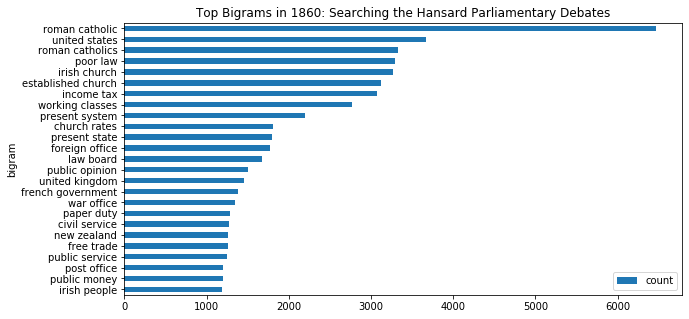

In [110]:
top_bigrams.sort_values(by=['count'], inplace=True, ascending=True)

top_bigrams.plot.barh(x = "bigram", y = "count",
            title = "Top Bigrams in 1860-69: Searching the Hansard Parliamentary Debates")

### Discussion

In this Notebook we asked: what is metadata? Can I create my own metadata, and to what use can I put it? 

Metadata, we learned, is data that communicates information about other data. We started our code excersize with metadata about the Hansard corpus that was far too general to draw analytical conclusions from in their own right, metadata like column headings, dates, and debate titles. We also had a column for debate text, but the text was not in a comprehensible form for deriving more metadata. Therefore, we processed the text column and created our own metadata, the top bigrams (sans stop words) with the purpose of gaining greater insight into Parliamentary discourse in the 1860s. 

While we were successful in our goals, much of this metadata beckons for a more focused search through the corpus. Many results are too general to draw conlcusions about the debates.

Indeed, these bigrams ask for a discerning analysts to search yet again but with a more focused topic. A discerning analyst could, for example, extract bigrams with just the word "nation" to investigate which words come directly before or after, and what nation's associations might tell us about a moment in time. Or, a discerning analyst could choose a particular subtopic like "gender" and narrow the search to just gendered terms.

The next Notebook thus picks up where this one leaves off by searching these debates but with a more focused question.